In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import PHONBANK_DFS, DATA_DIR, FIGURE_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/childes-paper/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [4]:
phone_df = pd.read_pickle(PHONBANK_DFS/'phone_df.pickle')

In [5]:
phone_df['n_phones'] = [len(list(flatten(i))) for i in phone_df.phones.values]

In [6]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/child...,1772
0,0,030006,3.000,Providence,eng,male,"[[*, haʊ, ˈbaʊ, *, ɪ, ˈdeɪ, mætʃ], [deɪ, ˈmætʃ...","[[xxx, how, <a>bout, xxx, if, they, match], [t...",/mnt/cube/tsainbur/Projects/github_repos/child...,2277
0,0,011117,2.000,Providence,eng,male,"[[None], [None], [None], [hɪ, ˈmi], [ˈbu], [No...","[[xxx], [xxx], [xxx], [help, me], [bowl], [xxx...",/mnt/cube/tsainbur/Projects/github_repos/child...,561


In [7]:
phone_df.dataset.unique()

array(['Providence', 'Davis', 'Goad'], dtype=object)

In [8]:
print("There are {} phones in this dataset".format(np.sum(phone_df.n_phones)))

There are 618583 phones in this dataset


In [9]:
import seaborn as sns
from childes_mi.utils.general import flatten,save_fig

## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [10]:
from childes_mi.information_theory import mutual_information as mi

In [11]:
distances = np.arange(1,101)

#### Run MI by age cohort

In [12]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/child...,1772
0,0,030006,3.000,Providence,eng,male,"[[*, haʊ, ˈbaʊ, *, ɪ, ˈdeɪ, mætʃ], [deɪ, ˈmætʃ...","[[xxx, how, <a>bout, xxx, if, they, match], [t...",/mnt/cube/tsainbur/Projects/github_repos/child...,2277
0,0,011117,2.000,Providence,eng,male,"[[None], [None], [None], [hɪ, ˈmi], [ˈbu], [No...","[[xxx], [xxx], [xxx], [help, me], [bowl], [xxx...",/mnt/cube/tsainbur/Projects/github_repos/child...,561


In [13]:
def quickplot_decay(distances, MI, shuff_MI, title=''):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.set_title(title)
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()

In [14]:
age_cohorts = [[0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

  0%|          | 0/6 [00:00<?, ?it/s]

0.5 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2641 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 2641 out of 2641 | elapsed:    3.2s finished


  0%|          | 0/2641 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2641 out of 2641 | elapsed:    1.2s finished


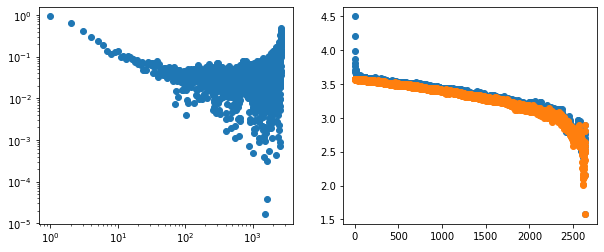

/home/AD/tsainbur/anaconda3/envs/childes-paper/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


  0%|          | 0/2278 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1920 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2278 out of 2278 | elapsed:    1.6s finished


  0%|          | 0/2278 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2082 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2278 out of 2278 | elapsed:    2.4s finished


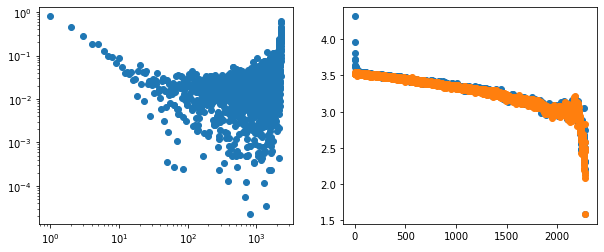

  0%|          | 0/625 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:    0.6s finished


  0%|          | 0/625 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:    0.7s finished


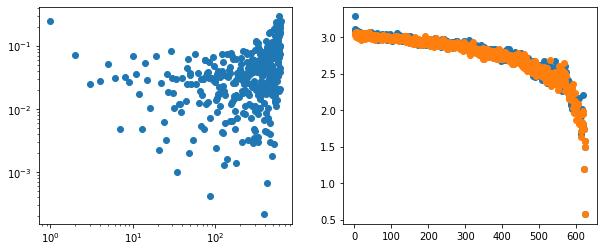

  0%|          | 0/1097 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1097 out of 1097 | elapsed:    1.1s finished


  0%|          | 0/1097 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 786 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1097 out of 1097 | elapsed:    1.2s finished


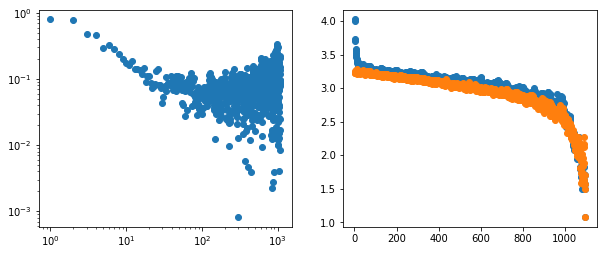

  0%|          | 0/616 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed:    0.6s finished


  0%|          | 0/616 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed:    0.5s finished


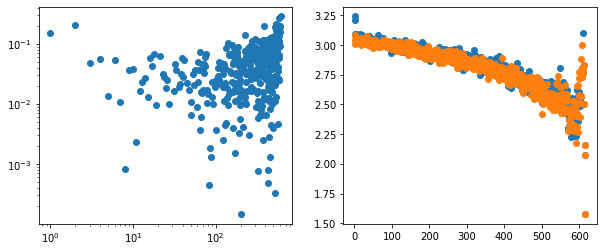

  0%|          | 0/1235 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1235 out of 1235 | elapsed:    1.3s finished


  0%|          | 0/1235 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1235 out of 1235 | elapsed:    0.9s finished


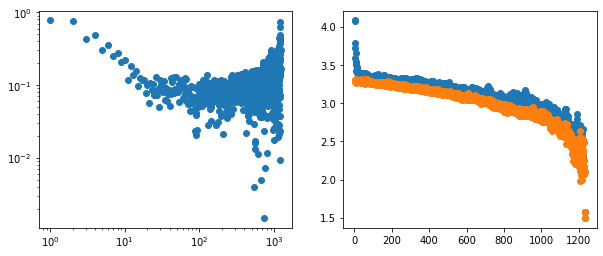

  0%|          | 0/948 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 786 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 948 out of 948 | elapsed:    0.8s finished


  0%|          | 0/948 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 787 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 948 out of 948 | elapsed:    0.8s finished


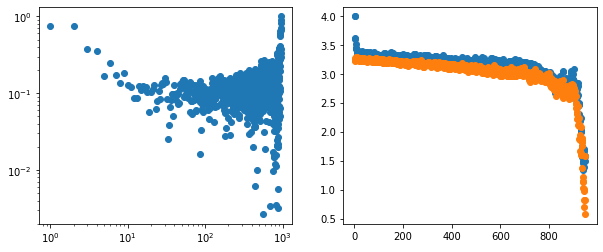

  0%|          | 0/912 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 786 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:    1.0s finished


  0%|          | 0/912 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:    1.3s finished


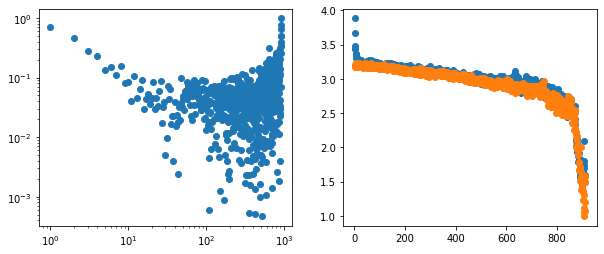

  0%|          | 0/908 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 908 out of 908 | elapsed:    1.2s finished


  0%|          | 0/908 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 908 out of 908 | elapsed:    0.9s finished


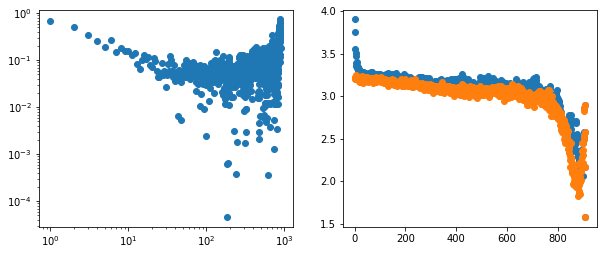

  0%|          | 0/583 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 583 out of 583 | elapsed:    0.7s finished


  0%|          | 0/583 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 488 out of 583 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 583 out of 583 | elapsed:    0.6s finished


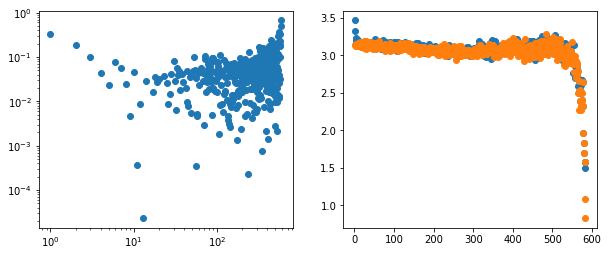

1 1.5


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7836 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7836 out of 7836 | elapsed:    3.3s finished


  0%|          | 0/7836 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6776 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 7836 out of 7836 | elapsed:    3.8s finished


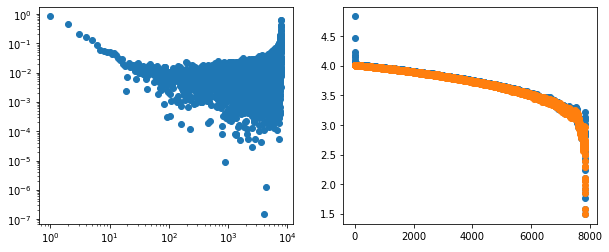

  0%|          | 0/6409 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4680 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6147 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6409 out of 6409 | elapsed:    3.0s finished


  0%|          | 0/6409 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6409 out of 6409 | elapsed:    2.6s finished


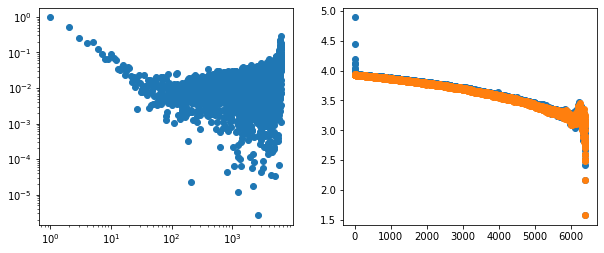

  0%|          | 0/6328 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2504 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6193 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6328 out of 6328 | elapsed:    2.6s finished


  0%|          | 0/6328 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4080 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6328 out of 6328 | elapsed:    2.7s finished


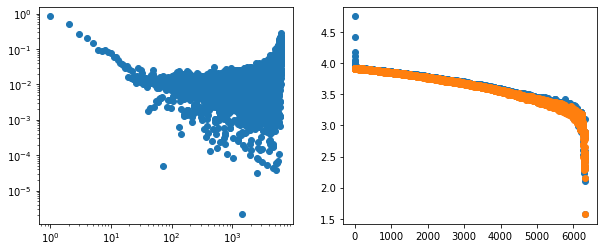

  0%|          | 0/6242 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3416 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5576 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6242 out of 6242 | elapsed:    3.0s finished


  0%|          | 0/6242 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4688 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6148 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6242 out of 6242 | elapsed:    2.6s finished


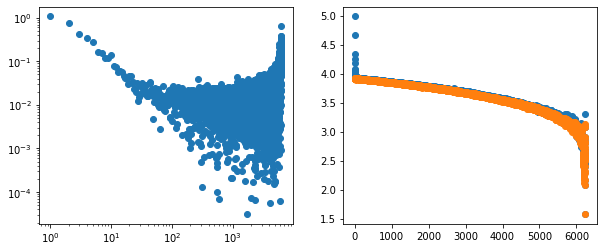

  0%|          | 0/6110 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6110 out of 6110 | elapsed:    3.1s finished


  0%|          | 0/6110 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3904 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5810 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6110 out of 6110 | elapsed:    2.9s finished


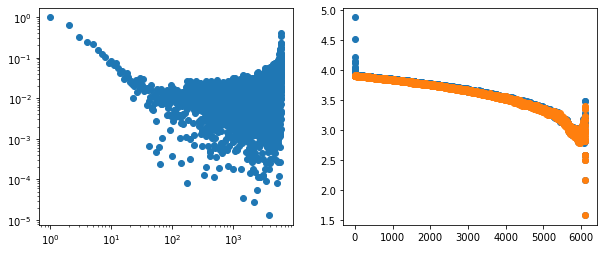

  0%|          | 0/6084 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5874 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 6084 out of 6084 | elapsed:    3.4s finished


  0%|          | 0/6084 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5296 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6084 out of 6084 | elapsed:    2.8s finished


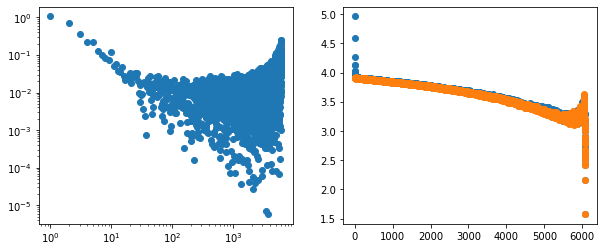

  0%|          | 0/5964 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3408 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5964 out of 5964 | elapsed:    2.6s finished


  0%|          | 0/5964 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5842 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5964 out of 5964 | elapsed:    2.6s finished


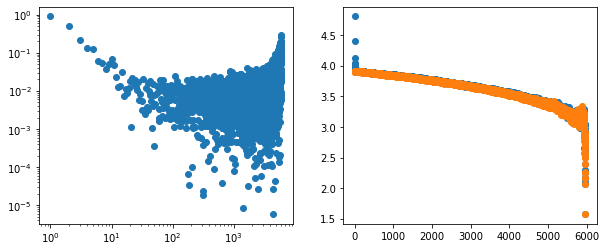

  0%|          | 0/5446 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4400 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5446 out of 5446 | elapsed:    2.4s finished


  0%|          | 0/5446 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3472 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 5446 out of 5446 | elapsed:    1.8s finished


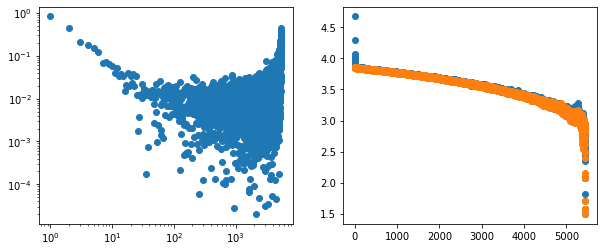

  0%|          | 0/4811 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4811 out of 4811 | elapsed:    2.3s finished


  0%|          | 0/4811 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4811 out of 4811 | elapsed:    2.1s finished


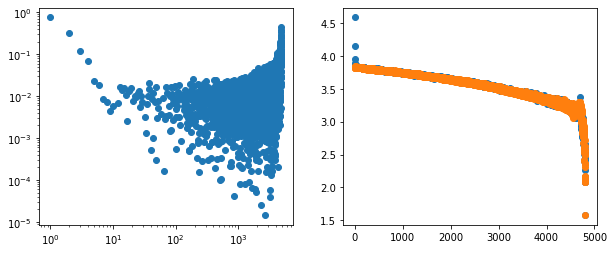

  0%|          | 0/5716 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5716 out of 5716 | elapsed:    2.7s finished


  0%|          | 0/5716 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5716 out of 5716 | elapsed:    2.8s finished


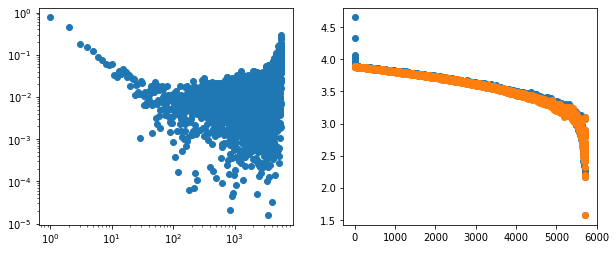

1.5 2


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9172 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8850 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 9172 out of 9172 | elapsed:    5.3s finished


  0%|          | 0/9172 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7392 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 9172 out of 9172 | elapsed:    4.7s finished


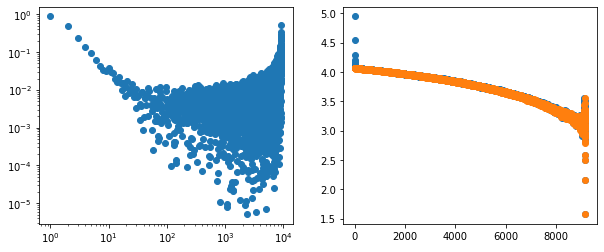

  0%|          | 0/7286 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4780 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 7286 out of 7286 | elapsed:    4.0s finished


  0%|          | 0/7286 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4432 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 7286 out of 7286 | elapsed:    2.7s finished


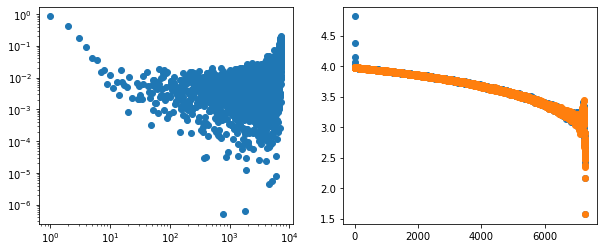

  0%|          | 0/8732 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7368 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8571 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8732 out of 8732 | elapsed:    4.3s finished


  0%|          | 0/8732 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8466 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 8732 out of 8732 | elapsed:    5.1s finished


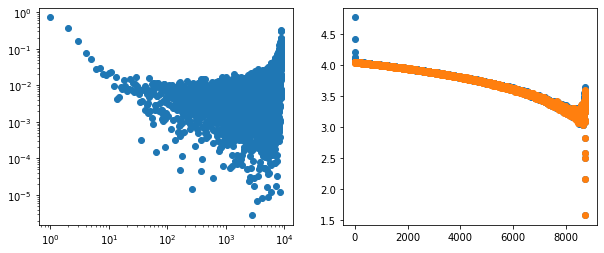

  0%|          | 0/7931 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7602 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7931 out of 7931 | elapsed:    3.8s finished


  0%|          | 0/7931 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4032 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6480 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 7931 out of 7931 | elapsed:    3.9s finished


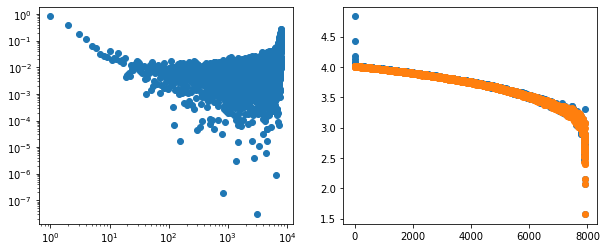

  0%|          | 0/7841 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4704 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6864 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7841 out of 7841 | elapsed:    3.9s finished


  0%|          | 0/7841 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 7841 out of 7841 | elapsed:    4.2s finished


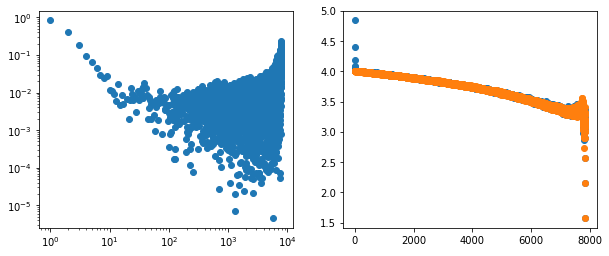

  0%|          | 0/6415 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3744 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6066 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6415 out of 6415 | elapsed:    3.7s finished


  0%|          | 0/6415 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2668 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3944 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6259 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6415 out of 6415 | elapsed:    3.5s finished


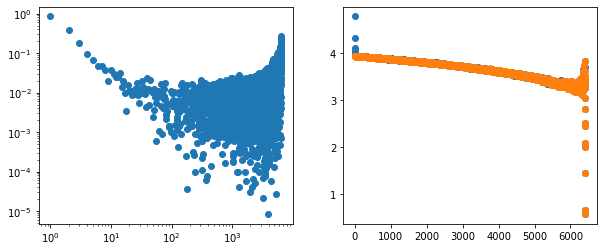

  0%|          | 0/6461 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5200 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 6461 out of 6461 | elapsed:    3.2s finished


  0%|          | 0/6461 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5970 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 6461 out of 6461 | elapsed:    3.8s finished


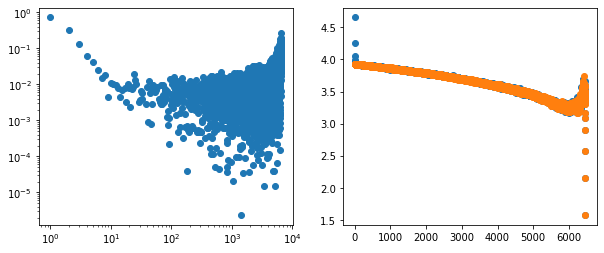

  0%|          | 0/6686 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4296 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 6686 out of 6686 | elapsed:    4.7s finished


  0%|          | 0/6686 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4416 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6402 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6686 out of 6686 | elapsed:    3.7s finished


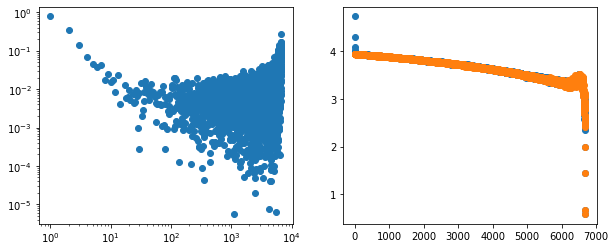

  0%|          | 0/7666 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7416 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 7666 out of 7666 | elapsed:    4.4s finished


  0%|          | 0/7666 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4440 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 6888 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 7666 out of 7666 | elapsed:    4.0s finished


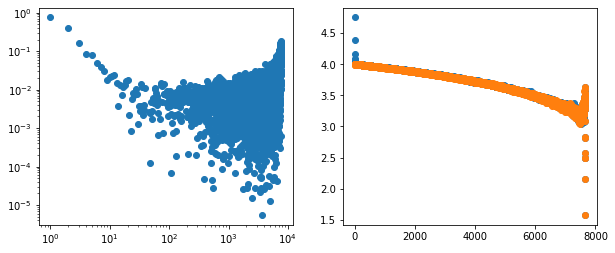

  0%|          | 0/6435 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 6435 out of 6435 | elapsed:    3.1s finished


  0%|          | 0/6435 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6435 out of 6435 | elapsed:    2.9s finished


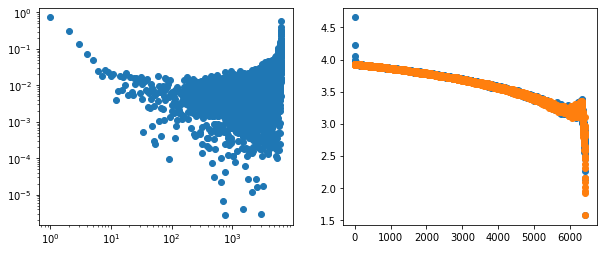

2 2.5


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11755 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3912 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 6792 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 8448 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 10248 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 11755 out of 11755 | elapsed:    7.7s finished


  0%|          | 0/11755 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3656 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7760 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 9416 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 11755 out of 11755 | elapsed:    7.3s finished


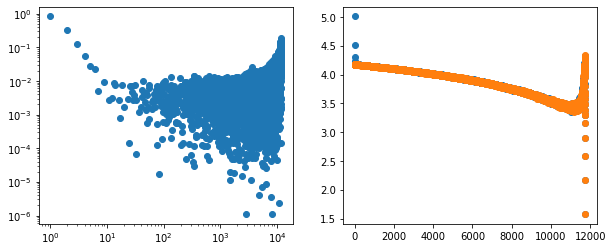

  0%|          | 0/11245 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4296 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 11245 out of 11245 | elapsed:    6.7s finished


  0%|          | 0/11245 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 8976 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 11245 out of 11245 | elapsed:    5.9s finished


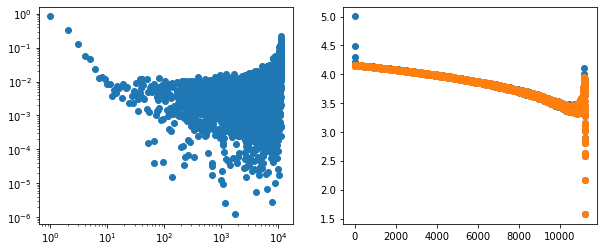

  0%|          | 0/10515 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 10416 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 10515 out of 10515 | elapsed:    6.1s finished


  0%|          | 0/10515 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2088 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4392 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 8496 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 10515 out of 10515 | elapsed:    6.2s finished


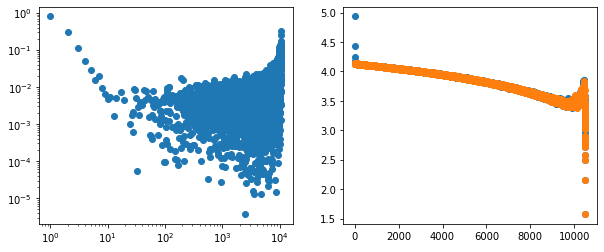

  0%|          | 0/9896 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7440 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 9672 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 9896 out of 9896 | elapsed:    4.7s finished


  0%|          | 0/9896 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3656 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 9184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 9896 out of 9896 | elapsed:    6.0s finished


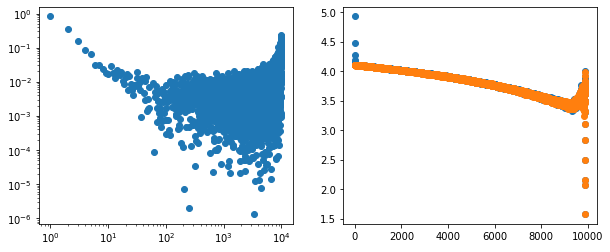

  0%|          | 0/9351 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1010 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1516 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2596 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3820 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5188 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 9256 out of 9351 | elapsed:    5.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9351 out of 9351 | elapsed:    5.7s finished


  0%|          | 0/9351 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1010 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2692 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3916 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5284 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 6796 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 9121 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 9351 out of 9351 | elapsed:    6.2s finished


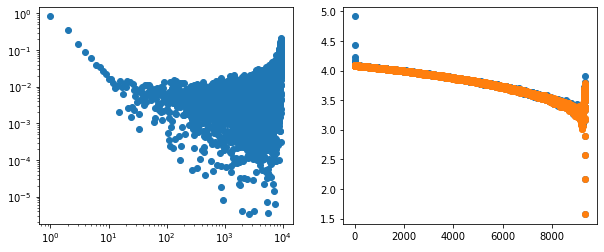

  0%|          | 0/10418 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2540 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 4808 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 5708 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 7724 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 10028 tasks      

  0%|          | 0/10418 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3756 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6348 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 7860 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 10418 out of 10418 | elapsed:    6.4s finished


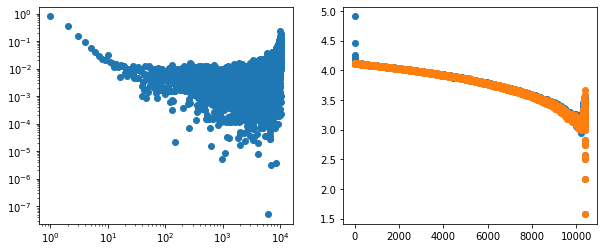

  0%|          | 0/7929 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 7929 out of 7929 | elapsed:    4.5s finished


  0%|          | 0/7929 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3912 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 6792 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 7929 out of 7929 | elapsed:    5.7s finished


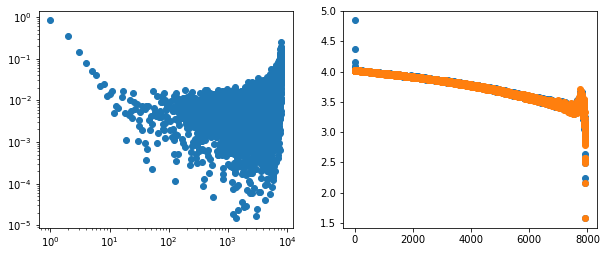

  0%|          | 0/8679 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 8208 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 8679 out of 8679 | elapsed:    5.2s finished


  0%|          | 0/8679 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1452 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3468 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 7512 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 8679 out of 8679 | elapsed:    5.0s finished


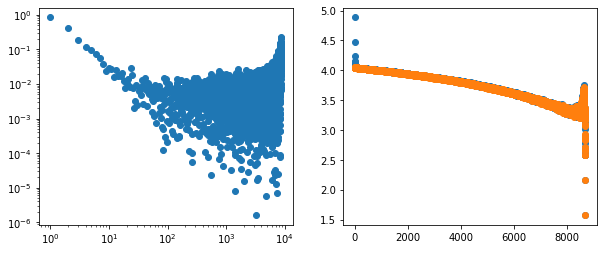

  0%|          | 0/7593 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 7416 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 7593 out of 7593 | elapsed:    4.1s finished


  0%|          | 0/7593 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6432 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7593 out of 7593 | elapsed:    4.6s finished


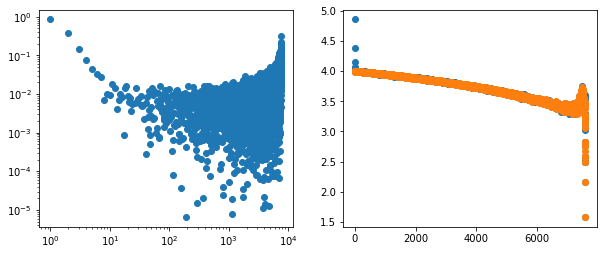

  0%|          | 0/11750 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3664 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6368 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 9392 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 11750 out of 11750 | elapsed:    5.9s finished


  0%|          | 0/11750 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 8400 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 11750 out of 11750 | elapsed:    6.3s finished


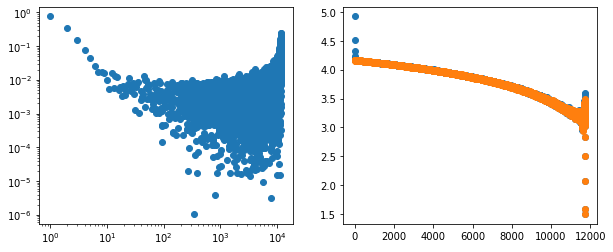

2.5 3


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/14358 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 9408 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 11208 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 14232 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 14358 out of 14358 | elapsed:    8.6s finished


  0%|          | 0/14358 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 7824 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 10560 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 13584 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 14358 out of 14358 | elapsed:    6.3s finished


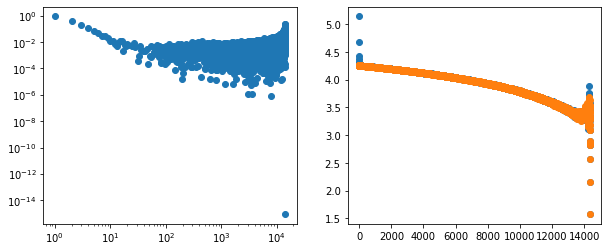

  0%|          | 0/11127 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8208 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 10776 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 11127 out of 11127 | elapsed:    5.2s finished


  0%|          | 0/11127 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4416 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6864 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 11127 out of 11127 | elapsed:    6.0s finished


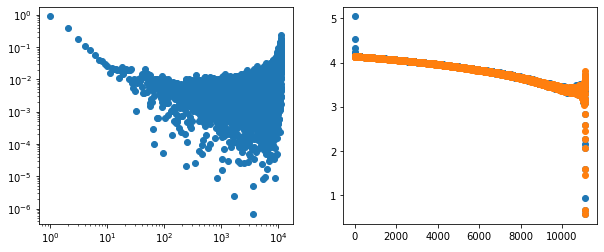

  0%|          | 0/11436 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7248 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 11436 out of 11436 | elapsed:    4.8s finished


  0%|          | 0/11436 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 6016 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 8752 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 11300 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 11436 out of 11436 | elapsed:    6.1s finished


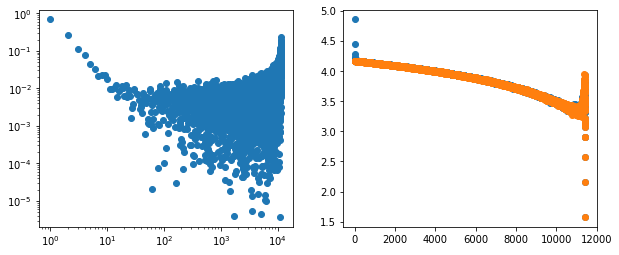

  0%|          | 0/11447 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 10368 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 11447 out of 11447 | elapsed:    7.0s finished


  0%|          | 0/11447 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 10560 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 11352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 11447 out of 11447 | elapsed:    5.1s finished


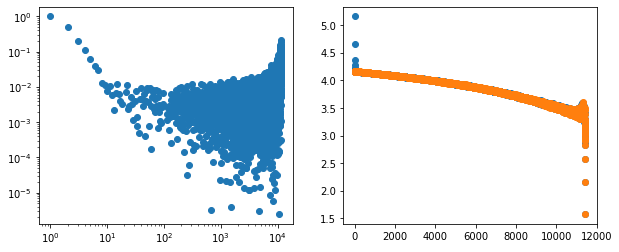

  0%|          | 0/11447 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3660 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6252 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7764 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 9420 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 11301 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 11447 out of 11447 | elapsed:    7.2s finished


  0%|          | 0/11447 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3652 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 6244 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7756 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 9412 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 11212 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 11447 out of 11447 | elapsed:    7.4s finished


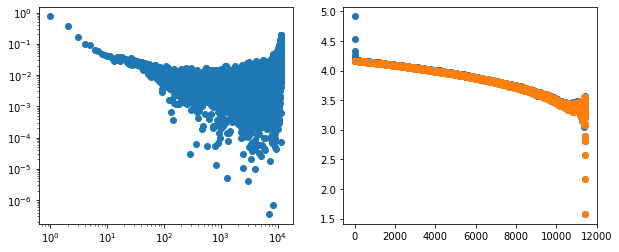

  0%|          | 0/10850 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 7680 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 10578 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 10850 out of 10850 | elapsed:    5.7s finished


  0%|          | 0/10850 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1920 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5952 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 8400 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 10632 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 10850 out of 10850 | elapsed:    5.0s finished


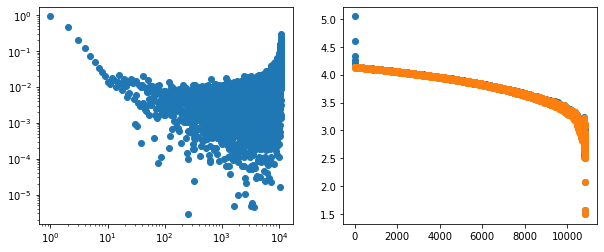

  0%|          | 0/9052 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8802 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 9052 out of 9052 | elapsed:    5.3s finished


  0%|          | 0/9052 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 5568 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7080 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 9052 out of 9052 | elapsed:    6.5s finished


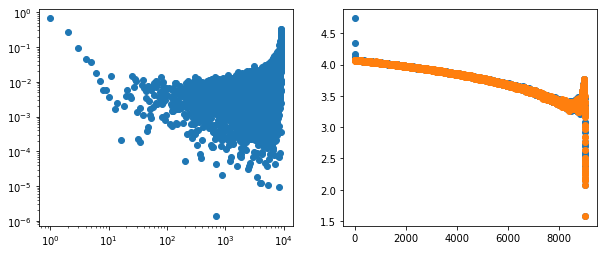

  0%|          | 0/8775 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7440 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8664 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8775 out of 8775 | elapsed:    4.1s finished


  0%|          | 0/8775 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4512 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8680 out of 8775 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 8775 out of 8775 | elapsed:    3.8s finished


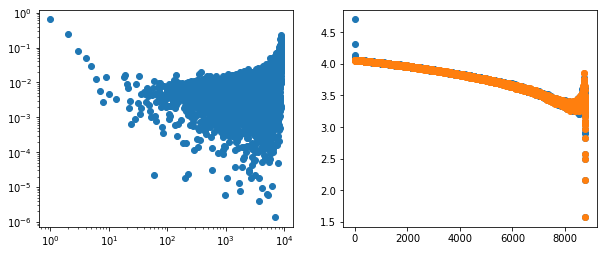

  0%|          | 0/8193 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4416 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6864 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8193 out of 8193 | elapsed:    4.0s finished


  0%|          | 0/8193 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4728 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8193 out of 8193 | elapsed:    3.5s finished


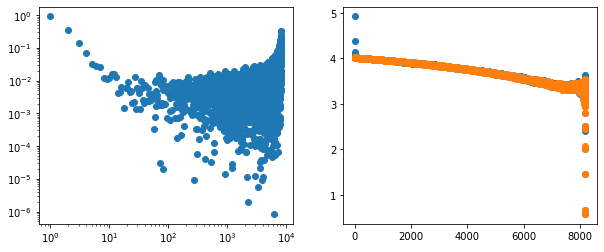

  0%|          | 0/8666 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7024 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 8521 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 8666 out of 8666 | elapsed:    4.1s finished


  0%|          | 0/8666 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6816 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 8466 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8666 out of 8666 | elapsed:    3.6s finished


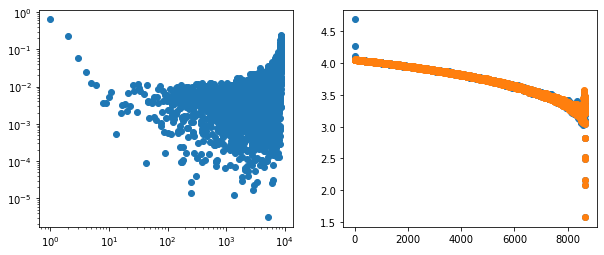

3 20


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11911 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9504 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11736 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 11911 out of 11911 | elapsed:    4.5s finished


  0%|          | 0/11911 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3656 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5728 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8464 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 11657 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 11911 out of 11911 | elapsed:    5.4s finished


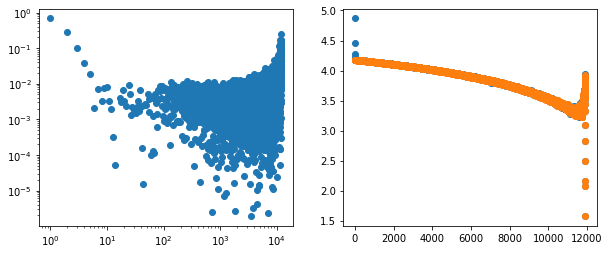

  0%|          | 0/9249 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 8712 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 9090 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 9249 out of 9249 | elapsed:    4.7s finished


  0%|          | 0/9249 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5096 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8761 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 9139 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 9249 out of 9249 | elapsed:    4.8s finished


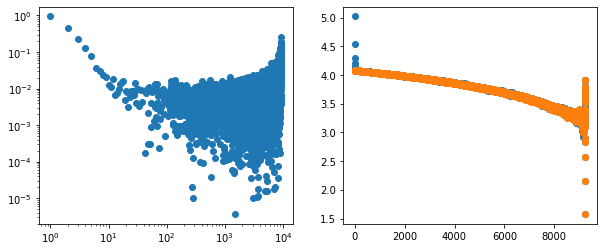

  0%|          | 0/9988 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5328 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8256 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 9714 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 9988 out of 9988 | elapsed:    5.3s finished


  0%|          | 0/9988 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 9988 out of 9988 | elapsed:    5.2s finished


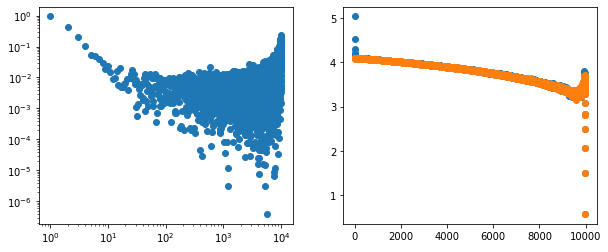

  0%|          | 0/7844 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7844 out of 7844 | elapsed:    3.3s finished


  0%|          | 0/7844 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 7844 out of 7844 | elapsed:    4.4s finished


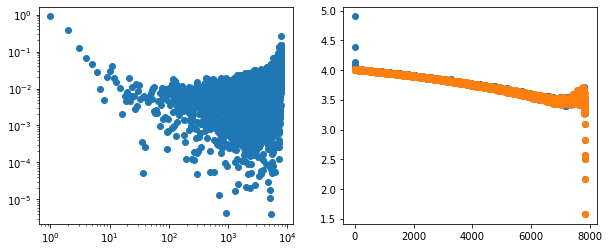

  0%|          | 0/9011 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7440 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 9011 out of 9011 | elapsed:    3.9s finished


  0%|          | 0/9011 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7632 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8856 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 9011 out of 9011 | elapsed:    4.2s finished


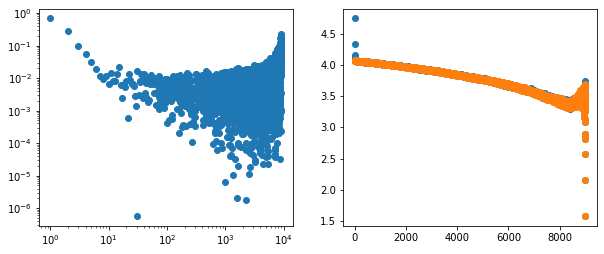

  0%|          | 0/7791 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2540 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 4808 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 5708 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 7696 out of 7791 | elapsed:    6.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 7791 out of 7791 | elapsed:    7.0s finished


  0%|          | 0/7791 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 7791 out of 7791 | elapsed:    3.6s finished


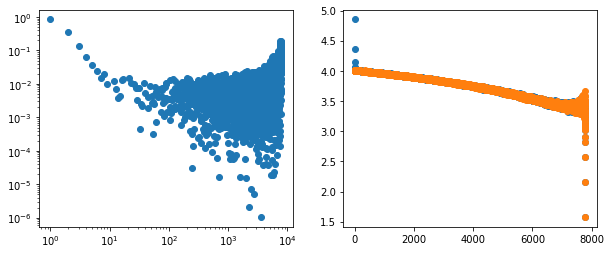

  0%|          | 0/9160 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5960 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8408 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9160 out of 9160 | elapsed:    3.8s finished


  0%|          | 0/9160 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 8256 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 9160 out of 9160 | elapsed:    4.6s finished


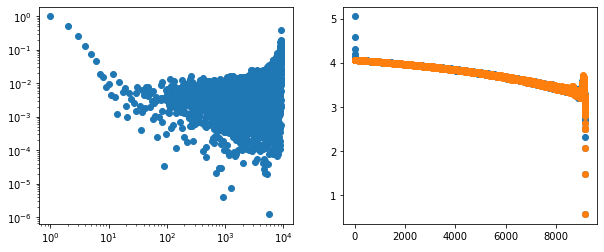

  0%|          | 0/8605 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8605 out of 8605 | elapsed:    3.6s finished


  0%|          | 0/8605 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7872 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 8605 out of 8605 | elapsed:    4.4s finished


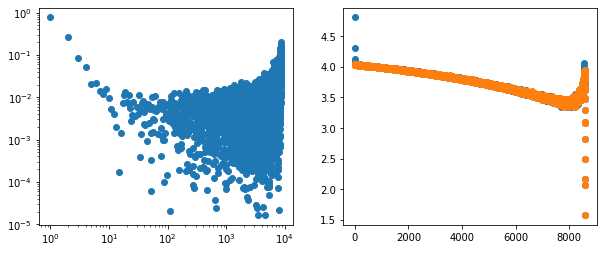

  0%|          | 0/7274 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7122 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 7274 out of 7274 | elapsed:    3.3s finished


  0%|          | 0/7274 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6912 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 7274 out of 7274 | elapsed:    4.3s finished


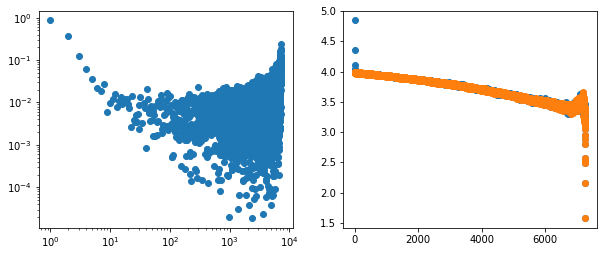

  0%|          | 0/8710 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4040 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6488 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8473 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8710 out of 8710 | elapsed:    4.2s finished


  0%|          | 0/8710 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5040 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 8472 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8710 out of 8710 | elapsed:    4.4s finished


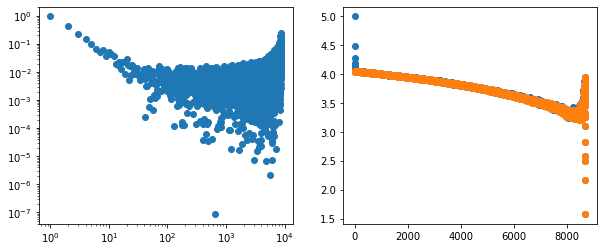

In [15]:
nex = 10

MI_DF_long = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_phones",
        "n_unique_phones",
        "age",
        "dataset",
        "xml_loc",
        "n_phones",  
        "phones_list"
        
    ]
)
    # for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):# [::-1]
    cohort_subset = phone_df[
        (phone_df.age > age_cohort_low) & (phone_df.age <= age_cohort_high)
    ]
    print(age_cohort_low, age_cohort_high)
    for idx, longest_row in tqdm(cohort_subset.sort_values(by='n_phones', ascending=False)[:nex].iterrows(), total=nex):
        phones_list = ''.join(flatten([i for i in flatten(longest_row.phones) if i is not None]))
    

        n_phones = len(phones_list)
        n_unique_phones = len(np.unique(phones_list))
        
        distances = np.arange(1, n_phones - 1)
        (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information([list(phones_list)],  
                                                                                  distances = distances, n_jobs=-1)
                
        quickplot_decay(distances, MI, shuff_MI, title='')
        
        MI_DF_long.loc[len(MI_DF_long)] = [
            MI,
            MI_var,
            shuff_MI,
            shuff_MI_var,
            distances,
            age_cohort_low,
            age_cohort_high,
            n_phones,
            n_unique_phones,
            longest_row.age,
            longest_row.dataset,
            longest_row.xml_loc,
            longest_row.n_phones,
            phones_list
            
        ]

In [16]:
MI_DF_long.to_pickle(DATA_DIR / "mi" / "phonbank_longest_seqs.pickle")